<a href="https://colab.research.google.com/github/temobgallardo/pattern_recognition/blob/main/practice1_wiener_and_lms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
from itertools import repeat
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy import matrix
from numpy import linalg

In [ ]:
def linearFunction(m1, m2, x1, x2, noise):
  r = m1*x1 + m2*x2 + noise
  # print("{0}*{1} + {2}*{3} + {4} = {5}".format(m1, x1, m2, x2, noise, r))
  return r

In [ ]:
def getFunction(num_samples, m1, m2, noise):
  x = np.arange(0, num_samples, dtype=float)
  x[0] = linearFunction(m1, m2, 0, 0, noise[0])
  # print(x[0])
  x[1] = linearFunction(m1, m2, x[0], 0, noise[1])
  # print(x[1])
  for i in range(num_samples):
    if (i > 1):
       x[i] = linearFunction(m1, m2, x[i - 1], x[i - 2], noise[i])
      #  print("I#{0}: {1}".format(i, x[i]))
  return x

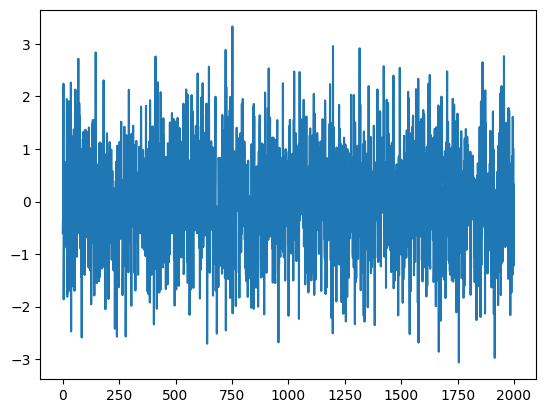

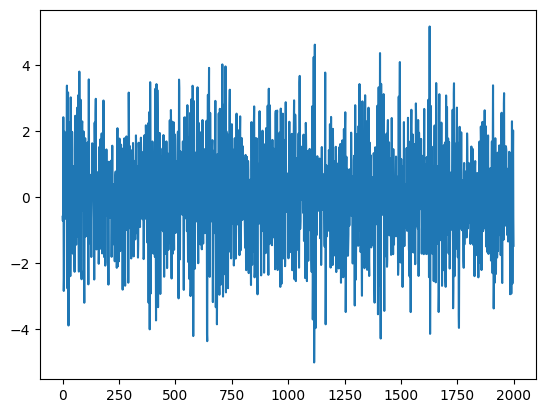

In [ ]:
mean = 0
std = 1
num_samples = 2000
noise = np.random.normal(mean, std, size=num_samples)
# print(noise)
plt.plot(noise)
plt.show()

m1 = 0.6530
m2 = -0.7001
x = getFunction(num_samples, m1, m2, noise)
plt.plot(x)
plt.show()

In [ ]:
def crossCorrelation(xObservations, filterWeights=[], samples = 8):
  return [singleCrossCorrelation(xObservations, k, samples) for k in filterWeights]

def singleCrossCorrelation(xObservations, k, samples = 8):
  resultToSum = [multiple(xObservations, i, k) for i in range(samples)]
  return sum(resultToSum)/samples

def multiple(xObservations, n, k):
  return xObservations[n + k]*xObservations[n]

def autoCorrelationMatrix(xObservations, filterWeights = [], samples = 8):
  size = len(filterWeights)
  ac = np.zeros([2, 2], dtype=float)
  # print(range(size))
  for row in range(size):
    for col in range(size):
      k = -row + col
      # print("I[{0}, {1}]: -{0} + {1} = {2}".format(row, col, k))
      sc = singleCrossCorrelation(xObservations, k, samples)
      # print(sc)
      ac[row][col] = sc
  return ac

def optimalWeightVector(xObservations, numWeinerScalars = [], samples = 8):
  ac = autoCorrelationMatrix(xObservations, numWeinerScalars, samples - len(numWeinerScalars))
  # print("Autocorrellation matrix: " + str(ac))

  aci = np.linalg.inv(ac)
  # print("Autocorrellation matrix inversed: " + str(aci))

  ccm = crossCorrelation(xObservations, numWeinerScalars, samples - len(numWeinerScalars))
  # print("Wiener coefficients T: " + str(ccm))

  # ccmMatrix = np.array(ccm).reshape(1, len(ccm))
  # print("Wiener coefficients: " + str(ccmMatrix))

  ccmMatrix = np.array(ccm).reshape(len(ccm), 1)
  # # print("Wiener coefficients: " + str(ccmMatrix))
  return [multiplyMatrix(aci, ccmMatrix)]

In [ ]:
def multiplyMatrix(A, B):
  rowsA = len(A)
  colsA = len(A[0])
  # print("A[{0}, {1}]".format(str(rowsA), str(colsA)))

  rowsB = len(B)
  colsB = len(B[0])
  # print("B[{0}, {1}]".format(str(rowsB), str(colsB)))

  if  colsA != rowsB:
    return "Lenght mismatch A[{0}, {1}] vs B[{2}, {3}]. Cannot multiply A and B.".format(str(rowsA), str(colsA), str(rowsB), str(colsB))

  C = np.zeros((rowsA, colsB), dtype = float)
  for row in range(rowsA):
    for col in range(colsA):
      for elt in range(colsB):
        C[row, elt] += A[row, col] * B[col, elt]

  return C


# Ejercicio 1: Filtro de Wiener



Wiener Filter Coefficients: [array([[ 0.63589782],
       [-0.68121301]])]


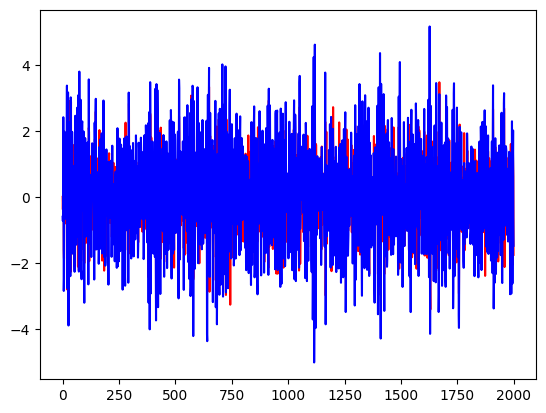

In [ ]:
# Ejercicio 1
x = getFunction(num_samples, m1, m2, noise)

result = optimalWeightVector(x, numWeinerScalars=[-1, -2], samples=2000)
print("Wiener Filter Coefficients: {0}".format(result))

rowsB = len(result)
colsB = len(result[0])
# print("result[{0}, {1}]".format(str(rowsB), str(colsB)))

y = [] * 2000
y.insert(0, linearFunction(result[0][0], result[0][1], 0, 0, 0))
y.insert(1, linearFunction(result[0][0], result[0][1], x[0], 0, 0))
for n in range(2000):
  if (n > 1):
    actual = linearFunction(result[0][0], result[0][1], x[n - 1], x[n - 2], 0)
    # print(actual)
    y.insert(n, actual)

# plt.plot(y, x)
# Plot the functions separately
plt.plot(y, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

# Ejercicio dos: Filtro Adaptable

In [ ]:
# def prediceted_w_coefficients(x, n, w, mu):
#   return w[n] + mu*x[n - 1]*error(x, n, w)

# def error(x, n, w):
#   return x[n] - w[n]*x[n - 1]

# def adaptiveWeinerFilter(wa, x, mu):
#   for n in range(len(wa) - 1):
#     wa[n + 1] = prediceted_w_coefficients(x, n, wa, mu)
#   print(wa)
#   return wa

# def predictedSignal(x, wa, mu):
#   wa = adaptiveWeinerFilter(wa, x, mu)
#   yn = [] * 2000
#   yn.insert(0, linearFunction(wa[1], wa[2], 0, 0, 0))
#   yn.insert(1, linearFunction(wa[1], wa[2], x[0], 0, 0))
#   for n in range(2000):
#     if (n > 1):
#       yn.insert(n, linearFunction(wa[1], wa[2], x[n - 1], x[n - 2], 0))
#       # print(actual)
#   return yn

In [ ]:
def generateObservations(n, noise, m1 = 0.6530, m2 = -0.7001, x_1 = 0, x_2 = 0):
  # print(n)
  if n == -1: return 0
  if n == 0: return linearFunction(m1, m2, 0, 0, noise[0])

  x = np.zeros(n + 1)
  x[0] = linearFunction(m1, m2, 0, 0, noise[0])

  def recursion(x, n, noise, m1, m2, x_1, x_2):
    if n == 1: x[1] = linearFunction(m1, m2, x_1, 0, noise[1])
    return linearFunction(m1, m2, x[n-1], x[n-2], noise[n])
  return recursion(x, n, noise, m1, m2, x_1, x_2)

def generateObservationsFiltered(n, w1, w2):
  x_1 = generateObservations(n, noise = noise)
  x_2 = generateObservations(n - 1, noise = noise)
  return linearFunction(w1, w2, x_1, x_2, 0)

def prediceted_w_coefficients(n, w, mu, noise, w1, w2):
  x = generateObservations(n, noise = noise)
  return w[n] + 2*mu*x*error(n, w, noise, w1, w2)

def error(n, w, noise, w1, w2):
  xn = generateObservations(n, noise)
  # xn_1 = generateObservations(n - 1, noise)
  dn = generateObservationsFiltered(n, w1, w2)
  return dn - w[n]*xn

def error2(n, w, noise):
  return generateObservations(n, noise) - sum(w[k]*generateObservations(n - k, noise) for k in range(len(w)))

def adaptiveWeinerFilter(wa, mu, noise, w1, w2):
  for n in range(len(wa) - 1):
    wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)
  print(wa)
  return wa

def predictedSignal(x, wa, mu, noise, w1, w2):
  wa = adaptiveWeinerFilter(wa, mu, noise, w1, w2)
  yn = [] * 2000
  yn.insert(0, linearFunction(wa[1], wa[2], 0, 0, 0))
  yn.insert(1, linearFunction(wa[1], wa[2], x[0], 0, 0))
  for n in range(2000):
    if (n > 1):
      yn.insert(n, linearFunction(wa[1], wa[2], x[n - 1], x[n - 2], 0))
      # print(actual)
  return yn

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[ 0.6         0.61302468  0.41604584  0.40337369  1.62964061  1.02814168
 -1.08080927 -1.00244067 -0.3872653   0.08505837  0.22725679  0.52281224
  0.38964463  0.35613609  0.41810612]


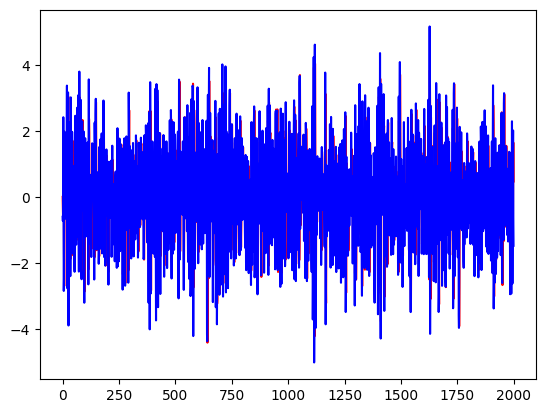

In [ ]:
mu = 0.5
initial_wa = 0.6
wa_len = 15
wa = np.zeros(wa_len)
wa[0] = initial_wa
# noise = np.random.normal(0, 1, size=num_samples)

# x = [generateObservations(n, noise, m1 = 0.6530, m2 = 0.7001, x_1 = 0, x_2 = 0) for n in range(num_samples)]
yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[ 0.6         0.61041974  0.45334448  0.44316216  1.26438693  1.79530266
 -0.79082828 -0.80128664 -0.39739575 -0.0176986   0.10310633  0.3803265
  0.28650819  0.26249071  0.35365015]


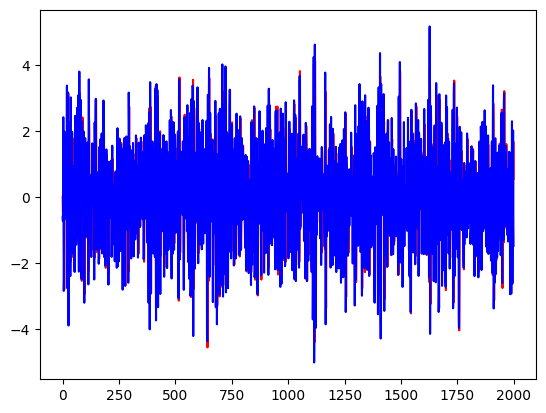

In [ ]:
mu = 0.4
wa = np.zeros(wa_len)
wa[0] = initial_wa

yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[ 0.6         0.60781481  0.49038921  0.48271925  0.97949315  1.96975865
 -0.12316206 -0.25732952 -0.13339319  0.11545143  0.1992074   0.38345005
  0.31287726  0.29432928  0.35209537]


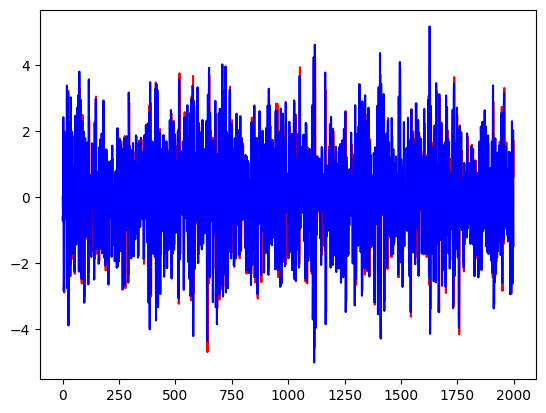

In [ ]:
mu = 0.3
wa = np.zeros(wa_len)
wa[0] = initial_wa

yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[0.6        0.60520987 0.52718004 0.52204474 0.7742626  1.71878567
 0.47055205 0.30621921 0.26522462 0.39495565 0.44120994 0.52429689
 0.47096359 0.45646053 0.45897391]


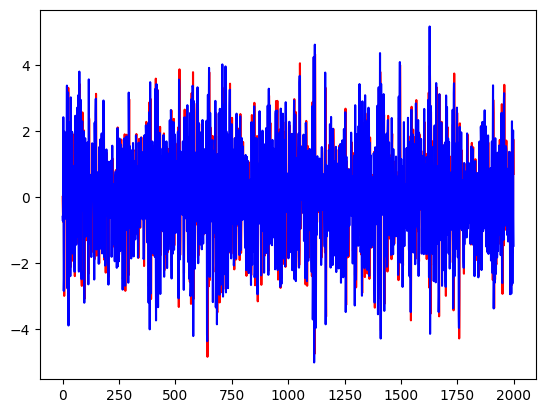

In [ ]:
mu = 0.2
wa = np.zeros(wa_len)
wa[0] = initial_wa

yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[0.6        0.60260494 0.56371697 0.5611384  0.64799772 1.20772898
 0.73332805 0.63458907 0.57807653 0.62874998 0.64786922 0.67244397
 0.64247207 0.63406092 0.61560166]


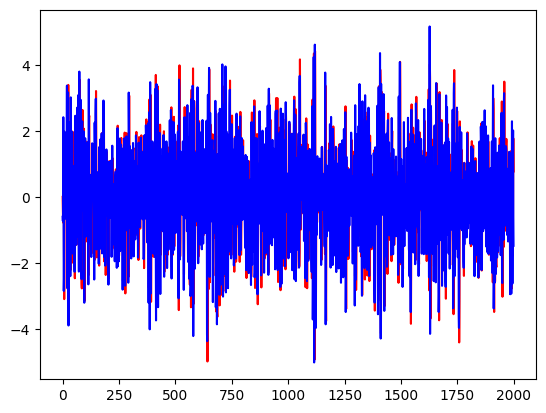

In [ ]:
mu = 0.1
wa = np.zeros(wa_len)
wa[0] = initial_wa

yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[0.6        0.60234444 0.5673567  0.565035   0.63968746 1.14862682
 0.73724875 0.64816112 0.59596013 0.6408361  0.65785694 0.67923614
 0.65212505 0.64449627 0.62684032]


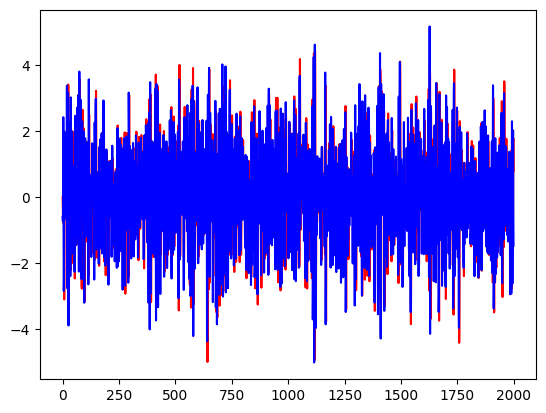

In [ ]:
mu = 0.09
wa = np.zeros(wa_len)
wa[0] = initial_wa

yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[0.6        0.60130247 0.58189022 0.58059822 0.61425915 0.90581095
 0.71283446 0.66411121 0.63423596 0.6582989  0.66760524 0.67908235
 0.66402235 0.65974392 0.64908872]


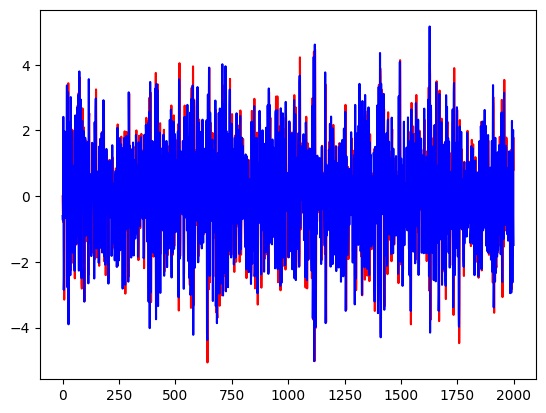

In [ ]:
mu = 0.05
wa = np.zeros(wa_len)
wa[0] = initial_wa

yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()

<ipython-input-270-87b892fd0a64>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wa[n + 1] = prediceted_w_coefficients(n, wa, mu, noise, w1, w2)


[0.6        0.60104197 0.58551726 0.58448322 0.60985177 0.84431449
 0.69713954 0.65855687 0.63490035 0.65413864 0.66161224 0.67099077
 0.65901498 0.65560578 0.64726537]


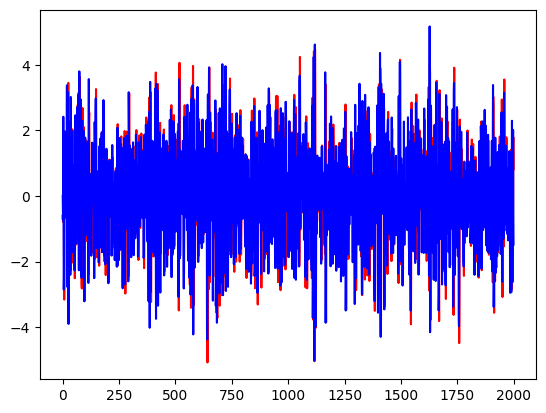

In [ ]:
mu = 0.04
wa = np.zeros(wa_len)
wa[0] = initial_wa

yn = predictedSignal(x, wa, mu, noise, result[0][0], result[0][1])

plt.plot(yn, 'r', label='Wiener Predictor')
plt.plot(x, 'b', label='Data')
plt.show()